PM_proj1



*   Rafael Amaral Pina Aguiar - up201904694
*   Ricardo Carvalho Araújo - up201906663



# TASK 1



In [ ]:
from numpy import *
from numpy.linalg import inv
from numpy.linalg import det
from google.colab import drive


In [ ]:
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/PM/Datasets-20231017.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/PM/Datasets-20231017.zip
  inflating: data1.txt               
  inflating: data2.txt               
  inflating: data3.txt               
  inflating: data4.txt               


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with open("data1.txt", "r") as file:
  lines = file.readlines()
data = []

# Loop through each line, split by tab (assuming tab-delimited data), and convert to float
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if line:  # Check if the line is not empty
        columns = line.split()  # Split by tab
        columns = [float(column) for column in columns]  # Convert to float if needed
        data.append(columns)

# Convert the list of lists into a NumPy array
measur = np.array(data)

with open("data2.txt", "r") as file:
  lines = file.readlines()
data = []

# Loop through each line, split by tab (assuming tab-delimited data), and convert to float
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if line:  # Check if the line is not empty
        columns = line.split()  # Split by tab
        columns = [float(column) for column in columns]  # Convert to float if needed
        data.append(columns)

# Convert the list of lists into a NumPy array
measur2 = np.array(data)

with open("data3.txt", "r") as file:
  lines = file.readlines()
data = []

# Loop through each line, split by tab (assuming tab-delimited data), and convert to float
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if line:  # Check if the line is not empty
        columns = line.split()  # Split by tab
        columns = [float(column) for column in columns]  # Convert to float if needed
        data.append(columns)

# Convert the list of lists into a NumPy array
measur3 = np.array(data)

with open("data4.txt", "r") as file:
  lines = file.readlines()
data = []

# Loop through each line, split by tab (assuming tab-delimited data), and convert to float
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if line:  # Check if the line is not empty
        columns = line.split()  # Split by tab
        columns = [float(column) for column in columns]  # Convert to float if needed
        data.append(columns)

# Convert the list of lists into a NumPy array
measur4 = np.array(data)

In [ ]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=a018cfc774ec750f495571f011a3b1ff010edaaef9d3185811e84aec9c7129f3
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


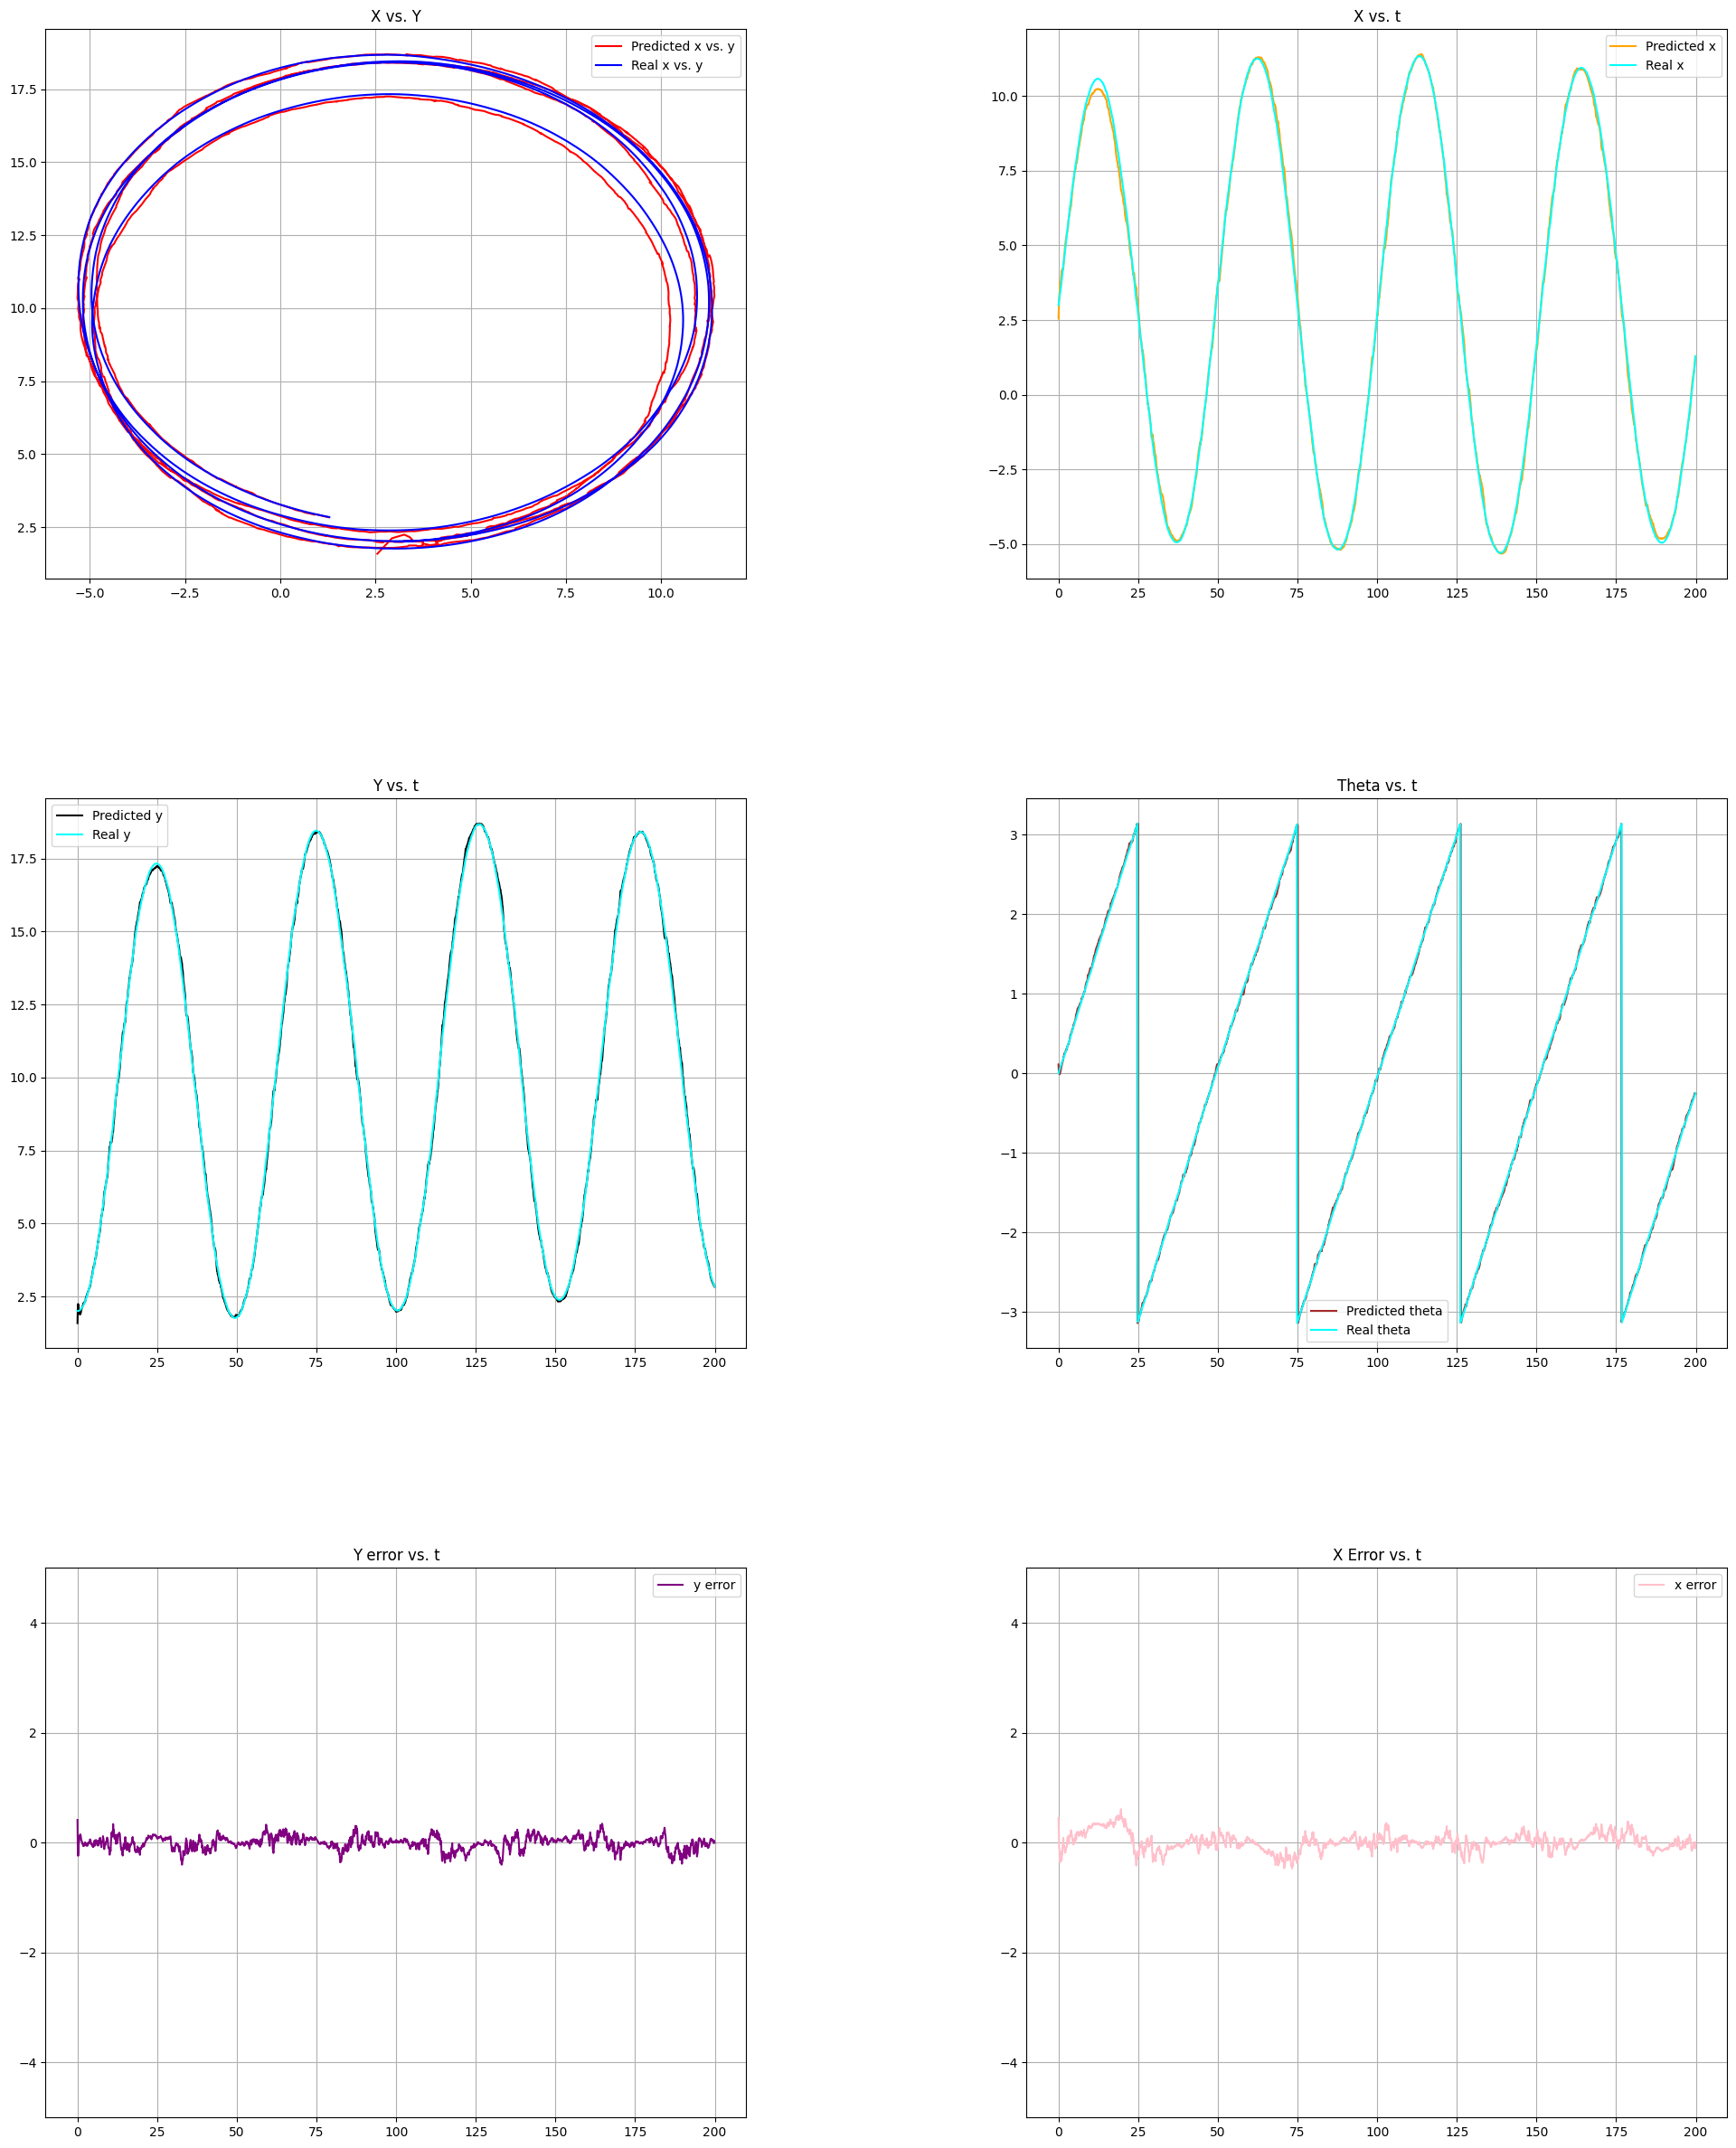

Y Mean Squared Error: 0.014153807274070306
X Mean Squared Error: 0.025767330413361815


In [ ]:
from filterpy.kalman.sigma_points import SimplexSigmaPoints
import scipy
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import JulierSigmaPoints
from filterpy.kalman import MerweScaledSigmaPoints


x = measur[:,1]
y = measur[:,2]
theta = measur[:,3]
v = measur[:,4]
w = measur[:,5]
t=measur[:,0]
r1 = measur[:,6]
psi1 = measur[:,7]
r2 = measur[:,8]
psi2 = measur[:,9]

theta_0=theta[0]
X=np.zeros([measur.shape[0]])
Y=np.zeros([measur.shape[0]])
V = np.zeros([measur.shape[0]])
W = np.zeros([measur.shape[0]])
Theta=np.zeros([measur.shape[0]])
X[0]=x[0]
Y[0]=y[0]
Theta[0]= theta[0]

R1=np.zeros([measur.shape[0]])
PSI1=np.zeros([measur.shape[0]])
R2=np.zeros([measur.shape[0]])
PSI2=np.zeros([measur.shape[0]])

def Q_matrix(x, y):
    return np.diag([1e-5, 1e-5, 1e-4, 0.1, 0.1,0.01])

sigma_r = 0.5
sigma_psi = 0.1
sigma_v = 0.5
sigma_w =.05


def residual(a, b): #predicted measurements - measurments, angles can't handle subtractions
    y2 = a[3] - b[3]
    y1 = a[1] - b[1]

    while y1 > np.pi:
        y1 -= 2*np.pi
    while y1 < -np.pi:
        y1 += 2*np.pi

    while y2 > np.pi:
        y2 -= 2*np.pi
    while y2 < -np.pi:
        y2 += 2*np.pi

    return a[0]-b[0],y1,a[2]-b[2],y2,a[4]-b[4],a[5]-b[5]



def f(state, dt):
    x_k, y_k, theta_k, v_k, w_k,ignore = state

    theta_dot = w_k * dt
    x_k1 = x_k + v_k / w_k * (np.sin(theta_k + theta_dot) - np.sin(theta_k))
    y_k1 = y_k + v_k / w_k * (- np.cos(theta_k + theta_dot) + np.cos(theta_k))
    theta_k1 = theta_k + theta_dot

    return x_k1,y_k1,theta_k1,v_k,w_k,ignore
    #return [x_k + dt * v_k * np.cos(theta_k), y_k + dt * v_k * np.sin(theta_k), theta_k + dt * w_k, v_k, w_k]

def h(state):
    x, y, theta, v, omega,ignore = state

    if x >= 10 and y <= 12.5:
      psi2 = np.arctan2(-y, (10-x)) - theta
    else:
      psi2 = np.arctan2(-y, (10-x)) - theta

    return [np.sqrt((0-x)**2 + (0-y)**2), np.arctan2((0-y), (0-x)) - theta, np.sqrt((10-x)**2 + (0-y)**2), psi2, v, omega]  # distance and bearing to the origin + linear and angular velocity

#points = MerweScaledSigmaPoints(5, alpha=0.9, beta=2., kappa=-2)
points = JulierSigmaPoints(6, kappa = 0.0)
#points = SimplexSigmaPoints(5, alpha = 1)
ukf = UKF(dim_x=6, dim_z=6, dt=.1, fx=f, hx=h, points=points)
ukf.x = np.array([x[0], y[0], theta[0], v[0], w[0], 0])  # initial state
ukf.R = np.diag([sigma_r**2, sigma_psi**2, sigma_r**2, sigma_psi**2, sigma_v**2, sigma_w**2])  # measurement uncertainty
#ukf.x_mean_fn = state_mean
#ukf.z_mean_fn = z_mean
ukf.residual_z = residual


#ukf.Q = np.diag([1e-10, 1e-9, 3e-4, .8e2, 6e3])
ukf.Q = Q_matrix(0,0)

#ukf.Q = np.diag([1e-5, 1e-5, 3e-4, 5e2, 5e3]) # process uncertainty
#ukf.Q = np.diag([0.001, 0.001, 1, 0.1, 0.1])  # process uncertainty

#ukf.P *= 0.1 # initial uncertainty

x_error = []
y_error = []
for k in range(measur.shape[0] - 1):
  ukf.predict()
  ukf.update(np.array([r1[k],psi1[k],r2[k],psi2[k], v[k], w[k]]))
  X[k], Y[k], Theta[k], V[k], W[k],_ = ukf.x
  R1[k], PSI1[k], R2[k], PSI2[k],_,_ = ukf.z
  x_error.append(x[k] - X[k])
  y_error.append(y[k] - Y[k])

  while Theta[k] >  pi:
    Theta[k] -= 2 * pi

  # Dynamic Q adjustment

  #ukf.Q = Q_matrix(X[k],Y[k])

  #ukf.R = R_matrix(X[k],Y[k])




  #print(f"X: {X}, Y: {Y}, Theta: {Theta}")
x_error.append(0)
y_error.append(0)
Theta[k+1] = Theta[k]
Y[k+1] = Y[k]
X[k+1] = X[k]

# Create a single figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(24, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the spacing between subplots

# Subplot 1: X vs. Y
axes[0, 0].plot(X, Y, color='red', label='Predicted x vs. y')
axes[0, 0].plot(x, y, color='blue', label='Real x vs. y')
axes[0, 0].set_title('X vs. Y')
axes[0, 0].grid()
axes[0, 0].legend()

# Subplot 2: X vs. t
axes[0, 1].plot(t, X, color='orange', label='Predicted x')
axes[0, 1].plot(t, x, color='cyan', label='Real x')
axes[0, 1].set_title('X vs. t')
axes[0, 1].grid()
axes[0, 1].legend()

# Subplot 3: Y vs. t
axes[1, 0].plot(t, Y, color='black', label='Predicted y')
axes[1, 0].plot(t, y, color='cyan', label='Real y')
axes[1, 0].set_title('Y vs. t')
axes[1, 0].grid()
axes[1, 0].legend()

# Subplot 4: Theta vs. t
axes[1, 1].plot(t, Theta, color='brown', label='Predicted theta')
axes[1, 1].plot(t, theta, color='cyan', label='Real theta')
axes[1, 1].set_title('Theta vs. t')
axes[1, 1].grid()
axes[1, 1].legend()

# Subplot 5: Error Y vs. t
axes[2, 0].plot(t, y_error, color='purple', label='y error')
axes[2, 0].set_title('Y error vs. t')
axes[2, 0].grid()
axes[2, 0].legend()
axes[2,0].set_ylim(-5, 5)

# Subplot 6: Error X vs. t
axes[2, 1].plot(t, x_error, color='pink', label='x error')
axes[2, 1].set_title('X Error vs. t')
axes[2, 1].grid()
axes[2, 1].legend()
axes[2,1].set_ylim(-5, 5)



# Display the plot
plt.show()

from sklearn.metrics import mean_squared_error

# assuming y_true is your array of true values and y_pred is your array of predicted values
msey = mean_squared_error(y, Y)
msex = mean_squared_error(x, X)

print(f'Y Mean Squared Error: {msey}')
print(f'X Mean Squared Error: {msex}')




# TASK 2

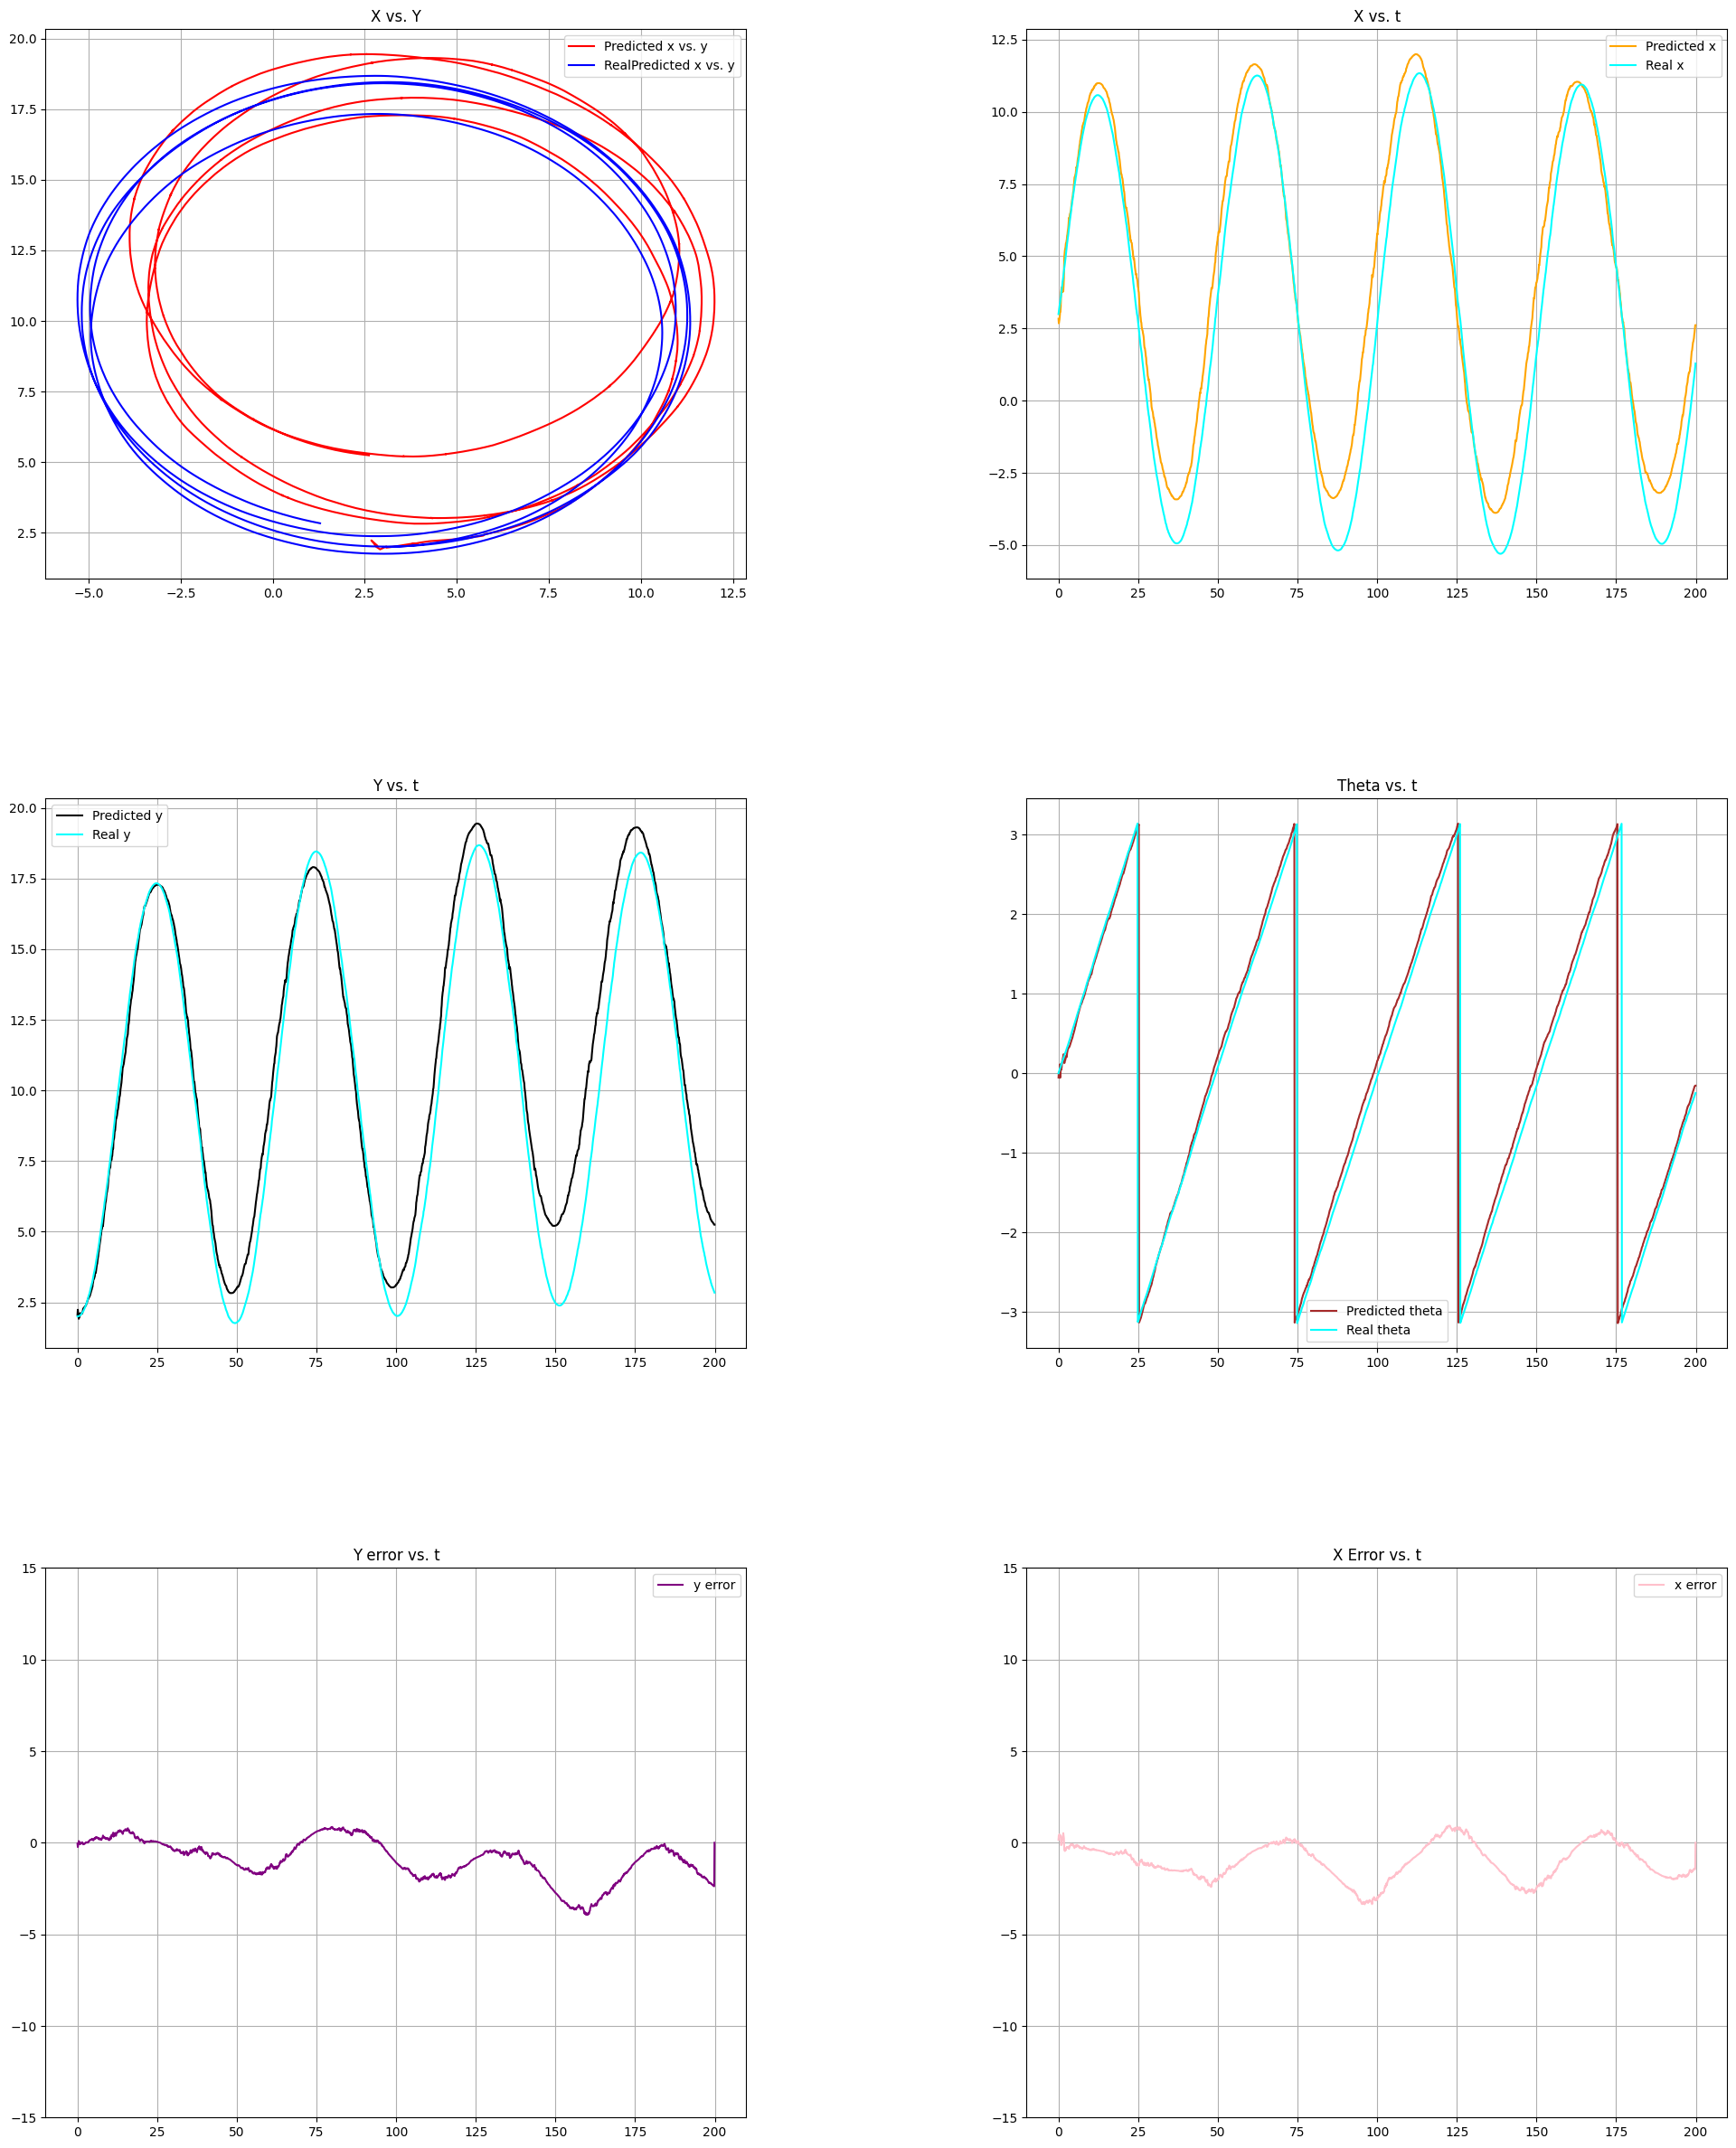

Y Mean Squared Error: 2.058469997057231
X Mean Squared Error: 2.021479098662392


In [ ]:
x = measur2[:,1]
y = measur2[:,2]
theta = measur2[:,3]
v = measur2[:,4]
w = measur2[:,5]
t=measur2[:,0]
r1 = measur2[:,6]
psi1 = measur2[:,7]
r2 = measur2[:,8]
psi2 = measur2[:,9]

theta_0=theta[0]
X=np.zeros([measur2.shape[0]])
Y=np.zeros([measur2.shape[0]])
V = np.zeros([measur2.shape[0]])
W = np.zeros([measur2.shape[0]])
Theta=np.zeros([measur2.shape[0]])
X[0]=x[0]
Y[0]=y[0]
Theta[0]= theta[0]

def h(state):
    x, y, theta, v, omega,ignore = state

    aux1 = np.arctan2((0-y), (0-x)) - theta
    aux2 = np.arctan2(-y, (10-x)) - theta

    if aux1 > np.pi/4 or aux1 < -np.pi/4:
      psi1 = 0
      r1 = 0
    else:
      psi1 = aux1
      r1 = np.sqrt((0-x)**2 + (0-y)**2)

    if aux2 > np.pi/4 or aux2 < -np.pi/4:
      psi2 = 0
      r2 = 0
    else:
      psi2 = aux2
      r2 = np.sqrt((10-x)**2 + (0-y)**2)


    return [r1, psi1, r2, psi2, v, omega]  # distance and bearing to the origin + linear and angular velocity





points = JulierSigmaPoints(6, kappa = 0.0)
#points = SimplexSigmaPoints(5, alpha = 1)
ukf2 = UKF(dim_x=6, dim_z=6, dt=.1, fx=f, hx=h, points=points)
ukf2.x = np.array([x[0], y[0], theta[0], v[0], w[0], 0])  # initial state
ukf2.R = np.diag([sigma_r**2, sigma_psi**2, sigma_r**2, sigma_psi**2, sigma_v**2, sigma_w**2])  # measurement uncertainty
#ukf.x_mean_fn = state_mean
#ukf2.z_mean_fn = z_mean
ukf2.residual_z = residual


#ukf.Q = np.diag([1e-6, 1e-6, 3e-4, .8e0, 0.6e0, 1e0])
ukf2.Q = Q_matrix(0,0)

#ukf.Q = np.diag([1e-5, 1e-5, 3e-4, 5e2, 5e3]) # process uncertainty
#ukf.Q = np.diag([0.001, 0.001, 1, 0.1, 0.1])  # process uncertainty

#ukf.P *= 0.1 # initial uncertainty

x_error = []
y_error = []
for k in range(measur.shape[0] - 1):
  ukf2.predict()
  ukf2.update(np.array([r1[k],psi1[k],r2[k],psi2[k], v[k], w[k]]))
  X[k], Y[k], Theta[k], V[k], W[k],_ = ukf2.x
  R1[k], PSI1[k], R2[k], PSI2[k],_,_ = ukf2.z
  x_error.append(x[k] - X[k])
  y_error.append(y[k] - Y[k])

  while Theta[k] >  pi:
    Theta[k] -= 2 * pi

x_error.append(0)
y_error.append(0)
Theta[k+1] = Theta[k]
Y[k+1] = Y[k]
X[k+1] = X[k]

# Create a single figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(24, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the spacing between subplots

# Subplot 1: X vs. Y
axes[0, 0].plot(X, Y, color='red', label='Predicted x vs. y')
axes[0, 0].plot(x, y, color='blue', label='RealPredicted x vs. y')
axes[0, 0].set_title('X vs. Y')
axes[0, 0].grid()
axes[0, 0].legend()

# Subplot 2: X vs. t
axes[0, 1].plot(t, X, color='orange', label='Predicted x')
axes[0, 1].plot(t, x, color='cyan', label='Real x')
axes[0, 1].set_title('X vs. t')
axes[0, 1].grid()
axes[0, 1].legend()

# Subplot 3: Y vs. t
axes[1, 0].plot(t, Y, color='black', label='Predicted y')
axes[1, 0].plot(t, y, color='cyan', label='Real y')
axes[1, 0].set_title('Y vs. t')
axes[1, 0].grid()
axes[1, 0].legend()

# Subplot 4: Theta vs. t
axes[1, 1].plot(t, Theta, color='brown', label='Predicted theta')
axes[1, 1].plot(t, theta, color='cyan', label='Real theta')
axes[1, 1].set_title('Theta vs. t')
axes[1, 1].grid()
axes[1, 1].legend()

# Subplot 5: Error Y vs. t
axes[2, 0].plot(t, y_error, color='purple', label='y error')
axes[2, 0].set_title('Y error vs. t')
axes[2, 0].grid()
axes[2, 0].legend()
axes[2,0].set_ylim(-15, 15)

# Subplot 6: Error X vs. t
axes[2, 1].plot(t, x_error, color='pink', label='x error')
axes[2, 1].set_title('X Error vs. t')
axes[2, 1].grid()
axes[2, 1].legend()
axes[2,1].set_ylim(-15, 15)



# Display the plot
plt.show()

from sklearn.metrics import mean_squared_error

# assuming y_true is your array of true values and y_pred is your array of predicted values
msey = mean_squared_error(y, Y)
msex = mean_squared_error(x, X)

print(f'Y Mean Squared Error: {msey}')
print(f'X Mean Squared Error: {msex}')




# Task 3

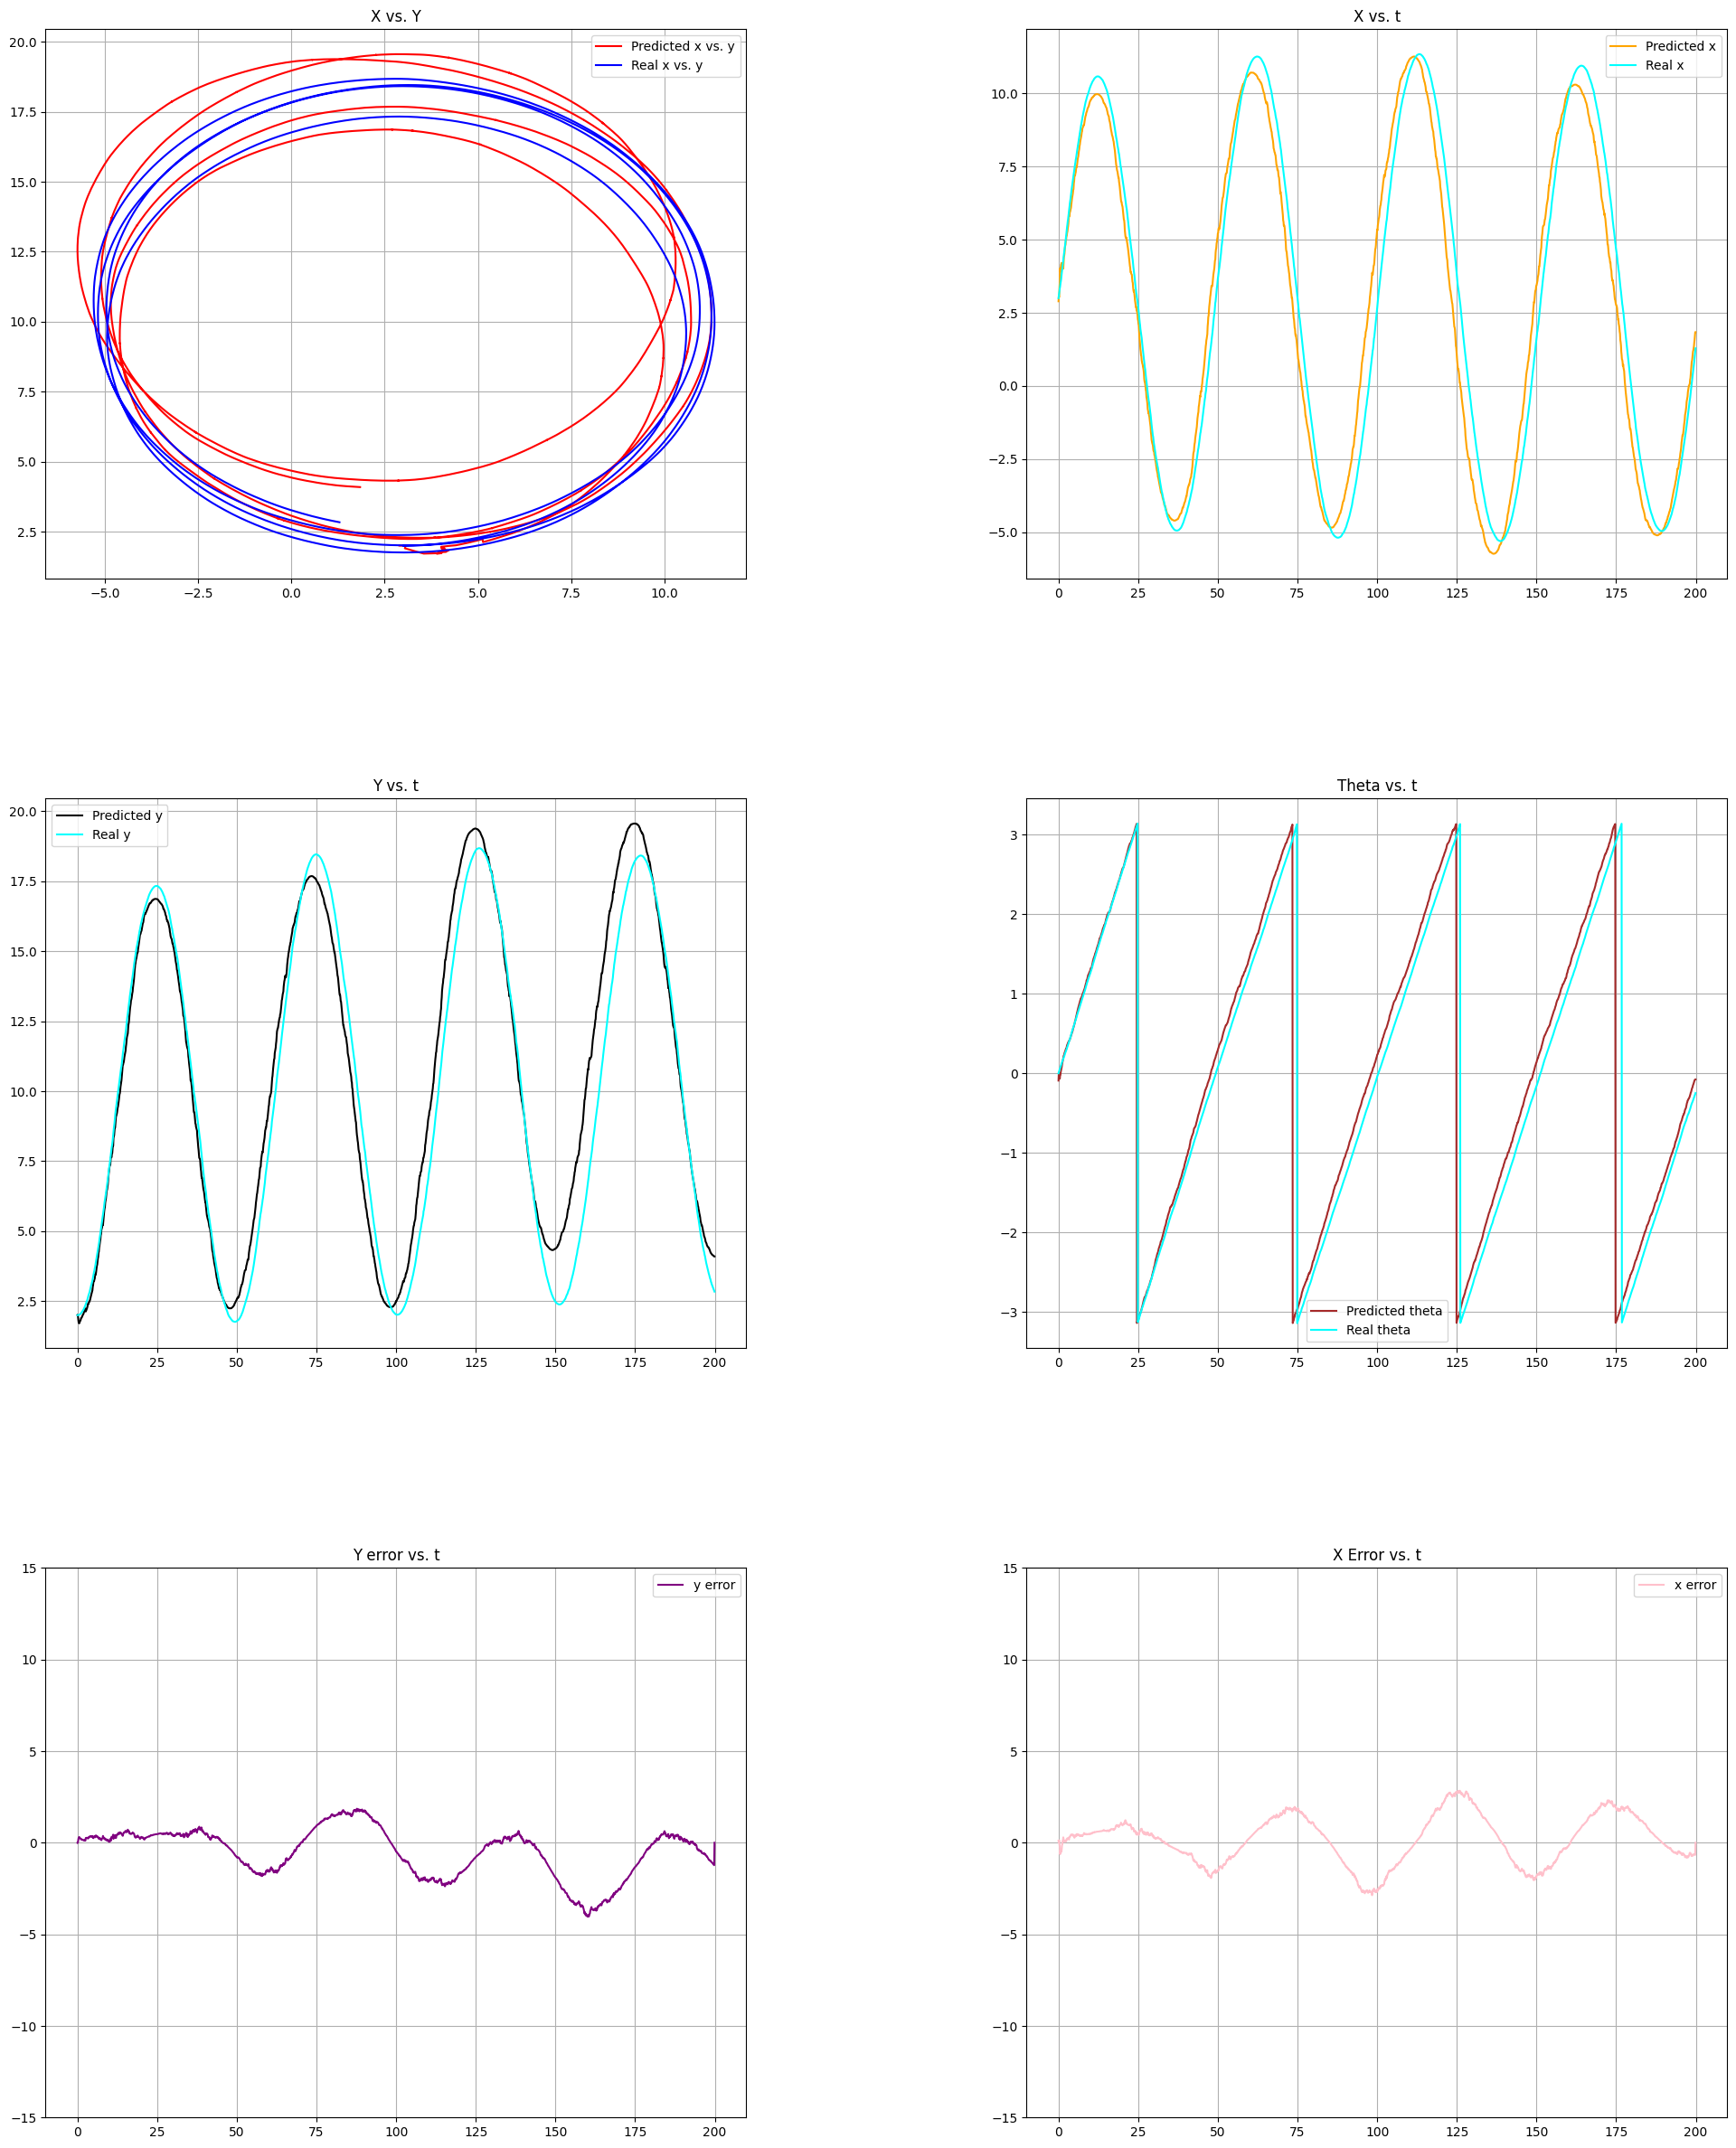

Y Mean Squared Error: 2.015859772077098
X Mean Squared Error: 1.7584301973333718


In [ ]:
#task 3 second way

x = measur3[:,1]
y = measur3[:,2]
theta = measur3[:,3]
v = measur3[:,4]
w = measur3[:,5]
t=measur3[:,0]
r = measur3[:,6]
psi = measur3[:,7]


theta_0=theta[0]
X=np.zeros([measur3.shape[0]])
Y=np.zeros([measur3.shape[0]])
V = np.zeros([measur3.shape[0]])
W = np.zeros([measur3.shape[0]])
Theta=np.zeros([measur3.shape[0]])
X[0]=x[0]
Y[0]=y[0]
Theta[0]= theta[0]

def f(state, dt):
    x_k, y_k, theta_k, v_k, w_k,ignore = state

    theta_dot = w_k * dt
    x_k1 = x_k + v_k / w_k * (np.sin(theta_k + theta_dot) - np.sin(theta_k))
    y_k1 = y_k + v_k / w_k * (- np.cos(theta_k + theta_dot) + np.cos(theta_k))
    theta_k1 = theta_k + theta_dot


    return x_k1,y_k1,theta_k1,v_k,w_k,ignore
    #return [x_k + dt * v_k * np.cos(theta_k), y_k + dt * v_k * np.sin(theta_k), theta_k + dt * w_k, v_k, w_k]




def h3(state, hx_args):
    x, y, theta, v, omega, ignore = state

    meas = hx_args.get('meas')
    landmark_probs = hx_args.get('landmark_probs')

    # Initialize the measurement vector with large values
    r_best = 0
    psi_best = 0

    if meas == 0:
      return [0, 0, v, omega]

    # Iterate over all landmarks
    for i, landmark in enumerate(landmarks):
        landmark_x, landmark_y = landmark


        # Calculate range and bearing to the landmark
        r = np.sqrt((landmark_x - x)**2 + (landmark_y - y)**2)
        psi = np.arctan2((landmark_y - y), (landmark_x - x)) - theta


        # Check if the landmark is within the field of view
        if np.abs(psi) < np.pi / 4:
            # Calculate the residual between the measured range and the predicted range
            e = np.abs(meas - r)

            # Update the landmark probability based on the residual and noise model
            landmark_probs[i] = update_probability(landmark_probs[i], e)

            # If the updated probability is above a threshold, update the measurement vector
            if landmark_probs[i] > 0.5:
                r_best = r
                psi_best = psi


    return np.array([r_best, psi_best, v, omega])  # Distance and bearing to the best landmark + linear and angular velocity


landmark_probs = np.ones(2) / 2

def update_probability(prob, residual):
    # Calculate the probability density function (PDF) of the residual under the noise model
    pdf = 1 / np.sqrt(2 * np.pi * sigma_r**2) * np.exp(-0.5 * (residual**2) / (sigma_r**2))

    # Update the probability
    new_prob = prob * pdf

    # Normalize the probability
    new_prob /= np.sum(new_prob)

    return new_prob

def residual_3(a, b):
    y1 = a[1] - b[1]

    while y1 > np.pi:
        y1 -= 2*np.pi
    while y1 < -np.pi:
        y1 += 2*np.pi


    return a[0]-b[0],y1,a[2]-b[2],a[3]-b[3]



points = MerweScaledSigmaPoints(6, alpha=0.9, beta=2., kappa=-2)
landmarks = [[0, 0], [10, 0]]
#points = JulierSigmaPoints(6, kappa = 0.0)
#points = SimplexSigmaPoints(6, alpha = 1)
ukf3 = UKF(dim_x=6, dim_z=4, dt=.1, fx=f, hx=h3, points=points)
ukf3.x = np.array([x[0], y[0], theta[0], v[0], w[0], 0])  # initial state
ukf3.R = np.diag([sigma_r**2, sigma_psi**2,sigma_v**2, sigma_w**2])  # measurement uncertainty
#ukf.x_mean_fn = state_mean
#ukf3.z_mean_fn = z_mean
ukf3.residual_z = residual_3


ukf3.Q = np.diag([1e-8, 1e-8, 3e-6, 10, 1, 1e-9])
#ukf3.Q = Q_matrix(0,0)

#ukf.Q = np.diag([1e-5, 1e-5, 3e-4, 5e2, 5e3]) # process uncertainty
#ukf.Q = np.diag([0.001, 0.001, 1, 0.1, 0.1])  # process uncertainty

#ukf.P *= 0.1 # initial uncertainty

x_error = []
y_error = []
for k in range(measur.shape[0] - 1):
  hx_args={'meas': r[k],'landmark_probs': landmark_probs}
  ukf3.predict()
  ukf3.update(np.array([r[k], psi[k], v[k], w[k]]),hx_args = hx_args)
  X[k], Y[k], Theta[k], V[k], W[k],_ = ukf3.x
  #R1[k], PSI1[k], R2[k], PSI2[k],_,_ = ukf2.z
  x_error.append(x[k] - X[k])
  y_error.append(y[k] - Y[k])

  while Theta[k] >  pi:
    Theta[k] -= 2 * pi

x_error.append(0)
y_error.append(0)
Theta[k+1] = Theta[k]
Y[k+1] = Y[k]
X[k+1] = X[k]

# Create a single figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(24, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the spacing between subplots

# Subplot 1: X vs. Y
axes[0, 0].plot(X, Y, color='red', label='Predicted x vs. y')
axes[0, 0].plot(x, y, color='blue', label='Real x vs. y')
axes[0, 0].set_title('X vs. Y')
axes[0, 0].grid()
axes[0, 0].legend()

# Subplot 2: X vs. t
axes[0, 1].plot(t, X, color='orange', label='Predicted x')
axes[0, 1].plot(t, x, color='cyan', label='Real x')
axes[0, 1].set_title('X vs. t')
axes[0, 1].grid()
axes[0, 1].legend()

# Subplot 3: Y vs. t
axes[1, 0].plot(t, Y, color='black', label='Predicted y')
axes[1, 0].plot(t, y, color='cyan', label='Real y')
axes[1, 0].set_title('Y vs. t')
axes[1, 0].grid()
axes[1, 0].legend()

# Subplot 4: Theta vs. t
axes[1, 1].plot(t, Theta, color='brown', label='Predicted theta')
axes[1, 1].plot(t, theta, color='cyan', label='Real theta')
axes[1, 1].set_title('Theta vs. t')
axes[1, 1].grid()
axes[1, 1].legend()

# Subplot 5: Error Y vs. t
axes[2, 0].plot(t, y_error, color='purple', label='y error')
axes[2, 0].set_title('Y error vs. t')
axes[2, 0].grid()
axes[2, 0].legend()
axes[2,0].set_ylim(-15, 15)

# Subplot 6: Error X vs. t
axes[2, 1].plot(t, x_error, color='pink', label='x error')
axes[2, 1].set_title('X Error vs. t')
axes[2, 1].grid()
axes[2, 1].legend()
axes[2,1].set_ylim(-15, 15)



# Display the plot
plt.show()

from sklearn.metrics import mean_squared_error

# assuming y_true is your array of true values and y_pred is your array of predicted values
msey = mean_squared_error(y, Y)
msex = mean_squared_error(x, X)

print(f'Y Mean Squared Error: {msey}')
print(f'X Mean Squared Error: {msex}')



# Task 4

[array([14.86936839, 14.9680931 ]), array([15.27565294, 14.59119123]), array([14.87860293, 15.51242331]), array([14.8615385, 14.9646938]), array([15.00862254, 15.07862741]), array([14.86829596, 14.96931612]), array([14.86936839, 14.9680931 ]), array([14.46686135, 15.33815899]), array([14.85294526, 14.43074773]), array([14.87827014, 14.96935033]), array([14.73011144, 14.8575623 ])]
[array([-0.73593393, 11.2776507 ]), array([ 0.80989629, 11.70455426]), array([-0.75857788, 15.71747963]), array([-0.71993582, 11.27047802]), array([-0.83773664, 11.1292495 ]), array([-0.73092784, 11.27456783]), array([-0.73593393, 11.2776507 ]), array([-2.2818863 , 10.85131466]), array([-0.70467687,  6.84870094]), array([-0.75029935, 11.28817495]), array([-0.6341308 , 11.42605162])]


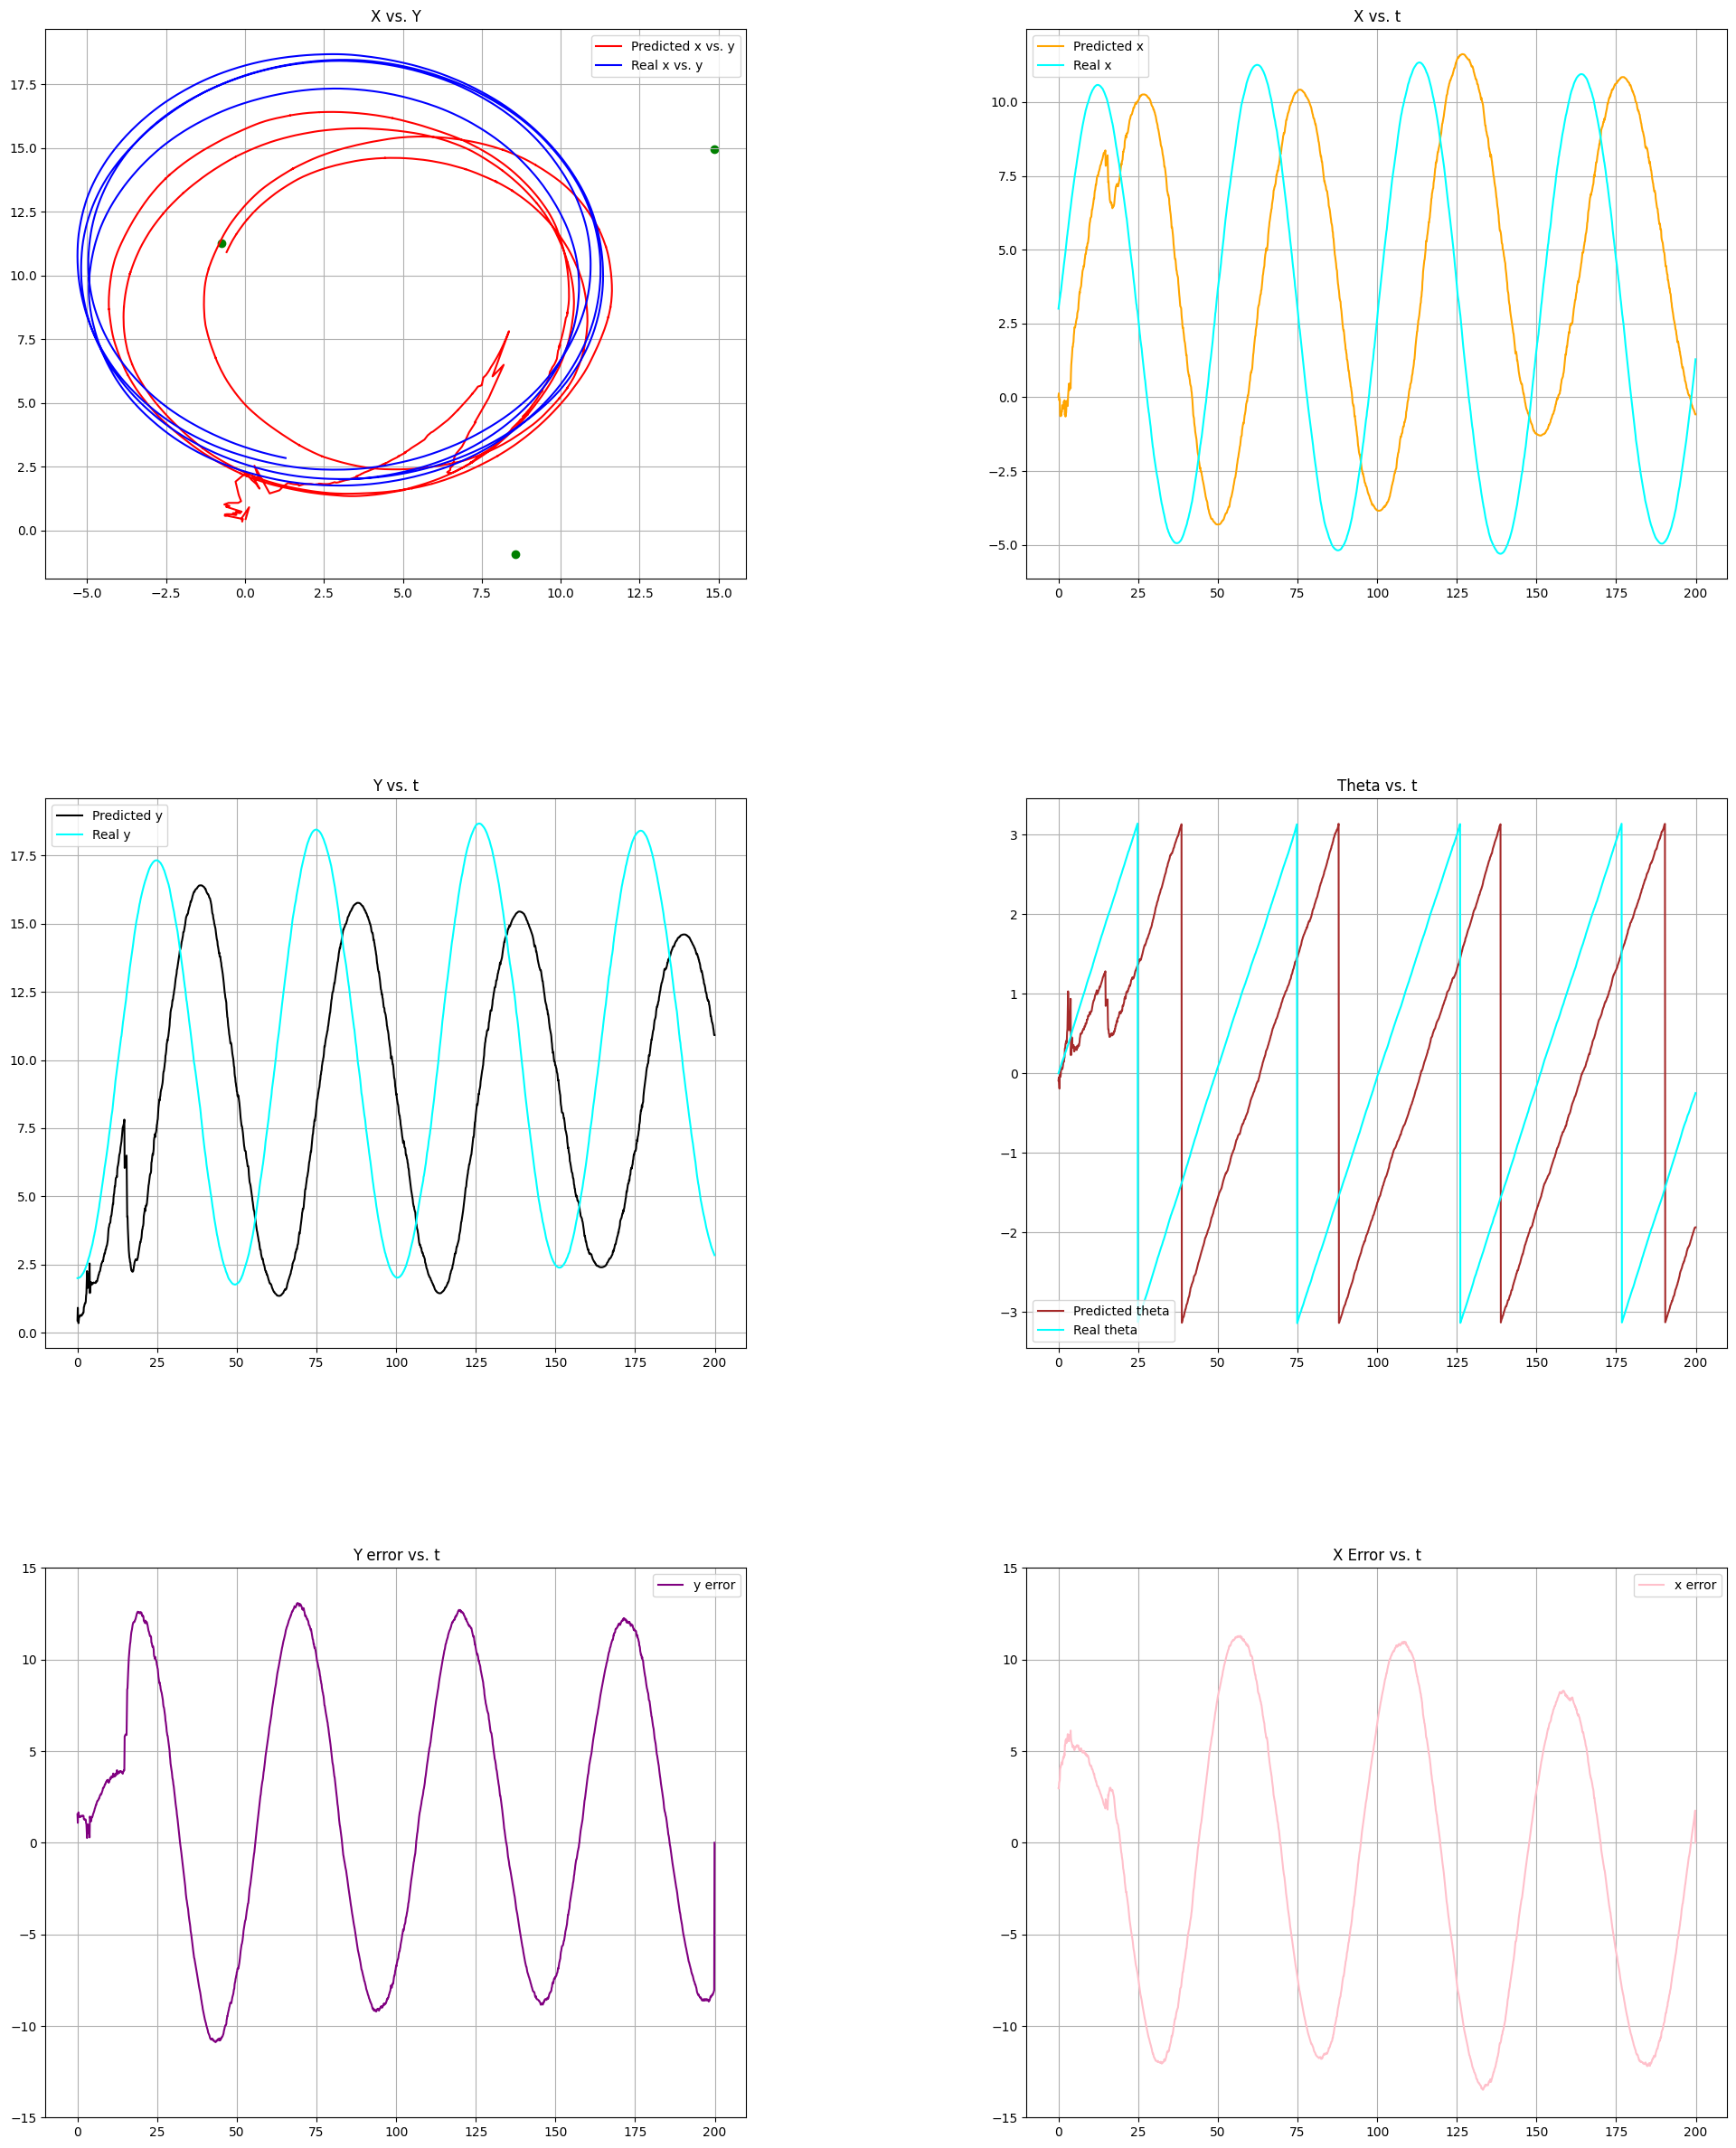

Y Mean Squared Error: 59.99291205404755
X Mean Squared Error: 61.38499423629163
------------------------------------------------
Landmarks: 

[array([ 8.56115538, -0.91274833]), array([14.86905799, 14.9680234 ]), array([-0.73455846, 11.27871571])]


In [ ]:

x = measur4[:,1]
y = measur4[:,2]
theta = measur4[:,3]
v = measur4[:,4]
w = measur4[:,5]
t=measur4[:,0]
r = measur4[:,6]
psi = measur4[:,7]


theta_0=theta[0]
X=np.zeros([measur4.shape[0]])
Y=np.zeros([measur4.shape[0]])
V = np.zeros([measur4.shape[0]])
W = np.zeros([measur4.shape[0]])
Theta=np.zeros([measur4.shape[0]])
X[0]=x[0]
Y[0]=y[0]
Theta[0]= theta[0]

def f(state, dt):
    x_k, y_k, theta_k, v_k, w_k,ignore = state

    theta_dot = w_k * dt
    x_k1 = x_k + v_k / w_k * (np.sin(theta_k + theta_dot) - np.sin(theta_k))
    y_k1 = y_k + v_k / w_k * (- np.cos(theta_k + theta_dot) + np.cos(theta_k))
    theta_k1 = theta_k + theta_dot


    return x_k1,y_k1,theta_k1,v_k,w_k,ignore
    #return [x_k + dt * v_k * np.cos(theta_k), y_k + dt * v_k * np.sin(theta_k), theta_k + dt * w_k, v_k, w_k]

landmarks = []
lm_error_threshold = 15 # max distance to consider same landmark

def ld_distance_error(real_lm,meas_lm):
  x_r,y_r = real_lm
  x_m,y_m = meas_lm


  return np.sqrt((x_r-x_m)**2 + (y_r-y_m)**2)

ld_row = [(-10e3,-10e3)]
consec_lds = 10
def h4_improved(state, hx_args):
    x, y, theta, v, omega, ignore = state

    r = hx_args.get('dis_meas')
    bearing = hx_args.get('bear_meas')

    if r == 0 or bearing == 0:
        return [0, 0, v, omega]

    x_landmark = x + r * cos(bearing)
    y_landmark = y + r * sin(bearing)


    aux_landmark = np.array([x_landmark, y_landmark])


    landmarks = hx_args.get('landmarks', [])
    ld_row = hx_args.get('ld_row',[])

    if len(landmarks) == 0:
      landmarks.append(aux_landmark)
      ld_row.append(aux_landmark)
      hx_args['landmarks'] = landmarks
      hx_args['ld_row'] = ld_row




    min_error = float('inf')
    index = -1

    ld_array = np.array(ld_row)
    # Compute the mean
    mean_point = np.mean(ld_array, axis=0) #landmark is the mean of the consecutive landmarks


    if ld_distance_error(aux_landmark,mean_point) > lm_error_threshold:

      ld_row = []
      ld_row.append(aux_landmark)  #if the new landmark is different to the ones stored in row, then start a new sequence
      hx_args['ld_row'] = ld_row
    else:
      ld_row.append(aux_landmark)
      hx_args['ld_row'] = ld_row

    for i, lm in enumerate(landmarks):
        error = ld_distance_error(lm, aux_landmark) #distance between current estimated landmark and "known" landmark
        if error < min_error:
            min_error = error #finds the closest landmark to the current one
            index = i

    if min_error > lm_error_threshold: #if the distance between closest and current is bigger than a certain value, than this could be a new landmark
      if len(ld_row) > consec_lds: #if this new landmark has been appearing several times, than its a new landmark
        ld_array = np.array(ld_row)
        mean_point = np.mean(ld_array, axis=0)
        landmarks.append(mean_point) #if landmark is consistently appearing add it to known landmarks
        hx_args['landmarks'] = landmarks
        index = len(landmarks) - 1
        print(ld_row)
    else:
       if len(ld_row) > 15:
        ld_array = np.array(ld_row)
        mean_point = np.mean(ld_array, axis=0)
        landmarks[index] = mean_point
        hx_args['landmarks'] = landmarks



    specific_landmark = landmarks[index]

    x_value = specific_landmark[0]
    y_value = specific_landmark[1]

    psi = np.arctan2((y_value - y), (x_value - x)) - theta
    r = np.sqrt((x_value - x)**2 + (y_value - y)**2)

    if np.abs(psi) > pi/4:
        r = 0
        psi = 0

    return [r, psi, v, omega]



def residual_4(a, b):
    y1 = a[1] - b[1]

    while y1 > np.pi:
        y1 -= 2*np.pi
    while y1 < -np.pi:
        y1 += 2*np.pi


    return a[0]-b[0],y1,a[2]-b[2],a[3]-b[3]

points = MerweScaledSigmaPoints(6, alpha=0.9, beta=2., kappa=-2)
#points = JulierSigmaPoints(6, kappa = 0.0)
#points = SimplexSigmaPoints(6, alpha = 1)
ukf4 = UKF(dim_x=6, dim_z=4, dt=.1, fx=f, hx=h4_improved, points=points)
ukf4.x = np.array([0, 0, -1e-1, v[0], w[0], 0])  # initial state
ukf4.R = np.diag([sigma_r**2, sigma_psi**2,sigma_v**2, sigma_w**2])  # measurement uncertainty
#ukf.x_mean_fn = state_mean
#ukf3.z_mean_fn = z_mean
ukf4.residual_z = residual_4


ukf4.Q = np.diag([1e-6, 1e-6, 3e-4, .8e0, 0.6e0, 1e0])
#ukf3.Q = Q_matrix(0,0)

#ukf.Q = np.diag([1e-5, 1e-5, 3e-4, 5e2, 5e3]) # process uncertainty
#ukf.Q = np.diag([0.001, 0.001, 1, 0.1, 0.1])  # process uncertainty

ukf.P *= 0.001 # initial uncertainty

x_error = []
y_error = []
landmarks = []
for k in range(measur.shape[0] - 1):
  hx_args={'dis_meas': r[k], 'bear_meas': psi[k], 'landmarks': landmarks, 'ld_row': ld_row}
  ukf4.predict()
  ukf4.update(np.array([r[k], psi[k], v[k], w[k]]),hx_args = hx_args )
  landmarks = hx_args['landmarks']
  X[k], Y[k], Theta[k], V[k], W[k],_ = ukf4.x
  #R1[k], PSI1[k], R2[k], PSI2[k],_,_ = ukf2.z
  x_error.append(x[k] - X[k])
  y_error.append(y[k] - Y[k])

  while Theta[k] >  pi:
    Theta[k] -= 2 * pi

x_error.append(0)
y_error.append(0)
Theta[k+1] = Theta[k]
Y[k+1] = Y[k]
X[k+1] = X[k]

# Create a single figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(24, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the spacing between subplots

# Subplot 1: X vs. Y


axes[0, 0].plot(X, Y, color='red', label='Predicted x vs. y')
axes[0, 0].plot(x, y, color='blue', label='Real x vs. y')
# Assuming landmarks is a list of arrays where each array is [x, y]
for point in landmarks:
    axes[0, 0].scatter(*point, color='green')  # plots each point in green
axes[0, 0].set_title('X vs. Y')
axes[0, 0].grid()
axes[0, 0].legend()

# Subplot 2: X vs. t
axes[0, 1].plot(t, X, color='orange', label='Predicted x')
axes[0, 1].plot(t, x, color='cyan', label='Real x')
axes[0, 1].set_title('X vs. t')
axes[0, 1].grid()
axes[0, 1].legend()

# Subplot 3: Y vs. t
axes[1, 0].plot(t, Y, color='black', label='Predicted y')
axes[1, 0].plot(t, y, color='cyan', label='Real y')
axes[1, 0].set_title('Y vs. t')
axes[1, 0].grid()
axes[1, 0].legend()

# Subplot 4: Theta vs. t
axes[1, 1].plot(t, Theta, color='brown', label='Predicted theta')
axes[1, 1].plot(t, theta, color='cyan', label='Real theta')
axes[1, 1].set_title('Theta vs. t')
axes[1, 1].grid()
axes[1, 1].legend()

# Subplot 5: Error Y vs. t
axes[2, 0].plot(t, y_error, color='purple', label='y error')
axes[2, 0].set_title('Y error vs. t')
axes[2, 0].grid()
axes[2, 0].legend()
axes[2,0].set_ylim(-15, 15)

# Subplot 6: Error X vs. t
axes[2, 1].plot(t, x_error, color='pink', label='x error')
axes[2, 1].set_title('X Error vs. t')
axes[2, 1].grid()
axes[2, 1].legend()
axes[2,1].set_ylim(-15, 15)



# Display the plot
plt.show()

from sklearn.metrics import mean_squared_error

# assuming y_true is your array of true values and y_pred is your array of predicted values
msey = mean_squared_error(y, Y)
msex = mean_squared_error(x, X)

print(f'Y Mean Squared Error: {msey}')
print(f'X Mean Squared Error: {msex}')

print("------------------------------------------------")
print("Landmarks: \n")
print(landmarks)

